## Fonction 1 

In [ ]:
# Import des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [2]:
# Téléchargement des ressources NLTK (à exécuter une seule fois)
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\odjen\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\odjen\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [3]:
df = pd.read_csv('C:/Users/odjen/Downloads/data_project.csv', sep='\t')

In [4]:
# Affichage des premières lignes pour vérifier la structure
print("Aperçu des données:")
print(df.head())

Aperçu des données:
                                               venue  \
0  international conference on human-computer int...   
1            visual analytics science and technology   
2       pattern recognition and machine intelligence   
3  international conference on computer graphics ...   
4  international symposium on computer and inform...   

                                            abstract  \
0  The purpose of this study is to develop a lear...   
1  This paper describes the design and implementa...   
2  This article applied GARCH model instead AR or...   
3                                                NaN   
4                                                NaN   

                                             authors  n_citation  \
0  ['Makoto Satoh', 'Ryo Muramatsu', 'Mizue Kayam...           0   
1                    ['Gareth Beale', 'Graeme Earl']          50   
2  ['Altaf Hossain', 'Faisal Zaman', 'Mohammed Na...          50   
3  ['Rafael Álvarez', 'Leandro Tor

In [5]:
# Vérification des colonnes
print("\nColonnes disponibles:")
print(df.columns.tolist())


Colonnes disponibles:
['venue', 'abstract', 'authors', 'n_citation', 'references', 'title', 'year', 'id', 'class']


In [6]:
# Informations sur les types de données et valeurs manquantes
print("\nInformations sur le dataframe:")
print(df.info())


Informations sur le dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40596 entries, 0 to 40595
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   venue       40596 non-null  object
 1   abstract    18013 non-null  object
 2   authors     40596 non-null  object
 3   n_citation  40596 non-null  int64 
 4   references  27246 non-null  object
 5   title       40596 non-null  object
 6   year        40596 non-null  int64 
 7   id          40596 non-null  object
 8   class       40596 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 2.8+ MB
None


In [7]:
# Statistiques descriptives
print("\nStatistiques descriptives:")
print(df.describe(include='all'))


Statistiques descriptives:
                                                    venue  \
count                                               40596   
unique                                               1701   
top     conference of the international speech communi...   
freq                                                 2315   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                                 abstract  \
count                                               18013   
unique                                              18011   
top     The Post-Proceedings of this Festschrift will ..

In [8]:
# Analyse des valeurs manquantes
print("\nValeurs manquantes par colonne:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


Valeurs manquantes par colonne:
abstract      22583
references    13350
dtype: int64



Distribution des classes:
1    10099
2     7388
5     5223
8     4812
7     4713
6     3570
4     2500
3     2291
Name: class, dtype: int64


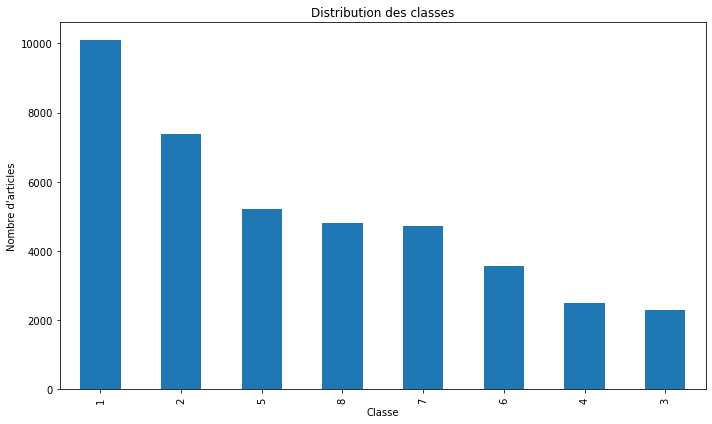

In [9]:
# Distribution des classes (si applicable)
if 'class' in df.columns:
    print("\nDistribution des classes:")
    class_distribution = df['class'].value_counts()
    print(class_distribution)
    
    # Visualisation de la distribution des classes
    plt.figure(figsize=(10, 6))
    class_distribution.plot(kind='bar')
    plt.title('Distribution des classes')
    plt.xlabel('Classe')
    plt.ylabel('Nombre d\'articles')
    plt.tight_layout()
    plt.savefig('class_distribution.png')
    plt.show()



Distribution temporelle:
1959       1
1960       2
1963       1
1966       2
1967       2
1968       2
1969      16
1970       7
1971      22
1972      26
1973      29
1974      20
1975      33
1976      38
1977      81
1978      53
1979      78
1980      68
1981     127
1982      99
1983     183
1984     156
1985     198
1986     285
1987     264
1988     231
1989     269
1990     352
1991     413
1992     415
1993     489
1994     479
1995     545
1996     580
1997     751
1998     903
1999     954
2000    1178
2001    1047
2002    1196
2003    1928
2004    1578
2005    1831
2006    1688
2007    2081
2008    2088
2009    1852
2010    1949
2011    3570
2012    3839
2013    3577
2014    2669
2015     213
2016     113
2017      25
Name: year, dtype: int64


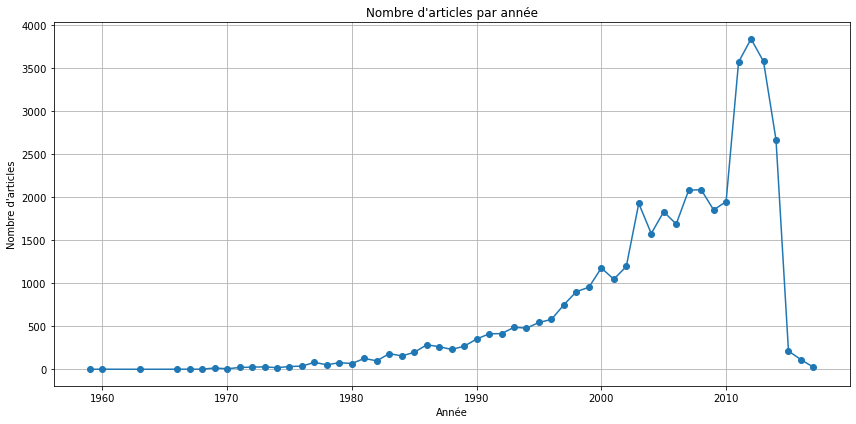

In [10]:
# Distribution temporelle (si applicable)
if 'year' in df.columns:
    print("\nDistribution temporelle:")
    year_distribution = df['year'].value_counts().sort_index()
    print(year_distribution)
    
    # Visualisation de la distribution temporelle
    plt.figure(figsize=(12, 6))
    year_distribution.plot(kind='line', marker='o')
    plt.title('Nombre d\'articles par année')
    plt.xlabel('Année')
    plt.ylabel('Nombre d\'articles')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('year_distribution.png')
    plt.show()



Top 20 des auteurs les plus fréquents:
'Mario Piattini']: 35 articles
'John H. L. Hansen']: 30 articles
'br': 24 articles
'Hermann Ney']: 24 articles
'Shrikanth Narayanan']: 22 articles
['Elena Maceviciute']: 22 articles
'Kaoru Hirota']: 19 articles
'Henri Prade']: 19 articles
'Satoshi Nakamura']: 18 articles
'Helmut Krcmar']: 18 articles
['Jörg Becker': 17 articles
'Kee-Young Yoo']: 16 articles
'Nobuaki Minematsu']: 15 articles
'Narayan C. Debnath']: 15 articles
'Bo Xu']: 14 articles
'Yoshinori Sagisaka']: 14 articles
'Keikichi Hirose': 14 articles
"Douglas D. O'Shaughnessy"]: 14 articles
'Eduardo Fernández-Medina': 14 articles
'Jianzhong Li': 13 articles


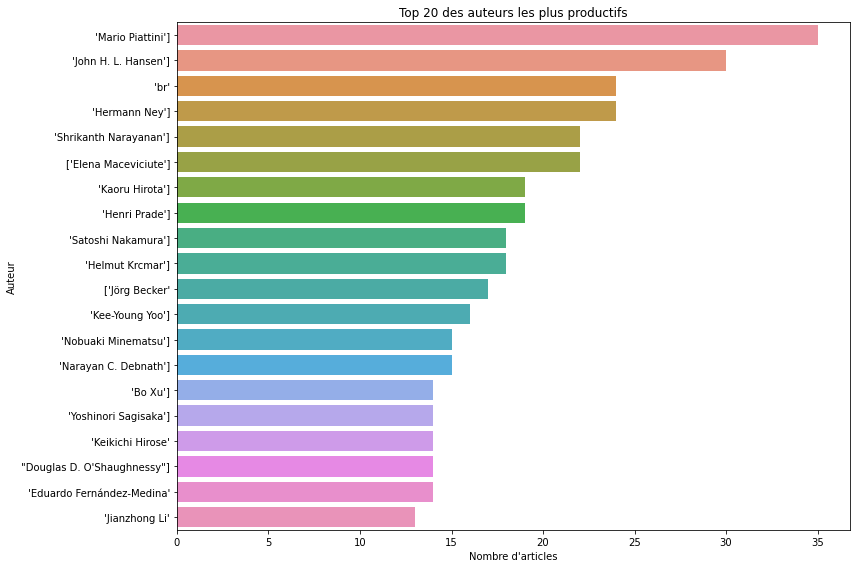

In [11]:
# Analyse des auteurs (si applicable)
if 'authors' in df.columns:
    # Extraction de tous les auteurs (en supposant qu'ils sont séparés par des virgules ou points-virgules)
    all_authors = []
    for authors_list in df['authors'].dropna():
        # Adaptez le séparateur selon votre format de données
        authors = re.split(r'[,;]', authors_list)
        all_authors.extend([author.strip() for author in authors])
    
    # Comptage des occurrences
    author_counts = Counter(all_authors)
    top_authors = author_counts.most_common(20)
    
    print("\nTop 20 des auteurs les plus fréquents:")
    for author, count in top_authors:
        print(f"{author}: {count} articles")
    
    # Visualisation des auteurs les plus fréquents
    plt.figure(figsize=(12, 8))
    authors_df = pd.DataFrame(top_authors, columns=['Auteur', 'Nombre d\'articles'])
    sns.barplot(x='Nombre d\'articles', y='Auteur', data=authors_df)
    plt.title('Top 20 des auteurs les plus productifs')
    plt.tight_layout()
    plt.savefig('top_authors.png')
    plt.show()


Statistiques sur la longueur des abstracts (nombre de mots):
count    40596.000000
mean        58.423736
std         76.643016
min          0.000000
25%          0.000000
50%          0.000000
75%        118.000000
max       1887.000000
Name: abstract_word_count, dtype: float64


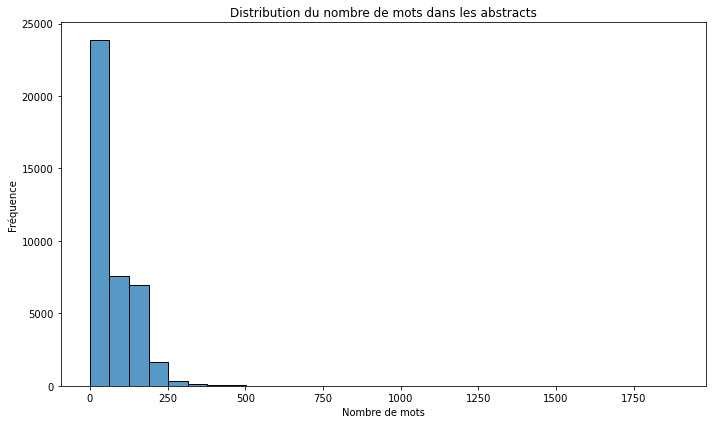


Top 30 des mots les plus fréquents dans les abstracts:
paper: 11353 occurrences
data: 9389 occurrences
system: 7643 occurrences
model: 7368 occurrences
based: 7229 occurrences
results: 6542 occurrences
using: 6384 occurrences
method: 6065 occurrences
approach: 6022 occurrences
information: 5995 occurrences
algorithm: 5893 occurrences
problem: 5788 occurrences
n: 5452 occurrences
used: 5253 occurrences
proposed: 5179 occurrences
systems: 5135 occurrences
new: 4894 occurrences
show: 4785 occurrences
also: 4325 occurrences
two: 4205 occurrences
r: 4182 occurrences
use: 4151 occurrences
different: 4019 occurrences
time: 4016 occurrences
performance: 3967 occurrences
learning: 3728 occurrences
present: 3679 occurrences
one: 3663 occurrences
analysis: 3570 occurrences
network: 3473 occurrences


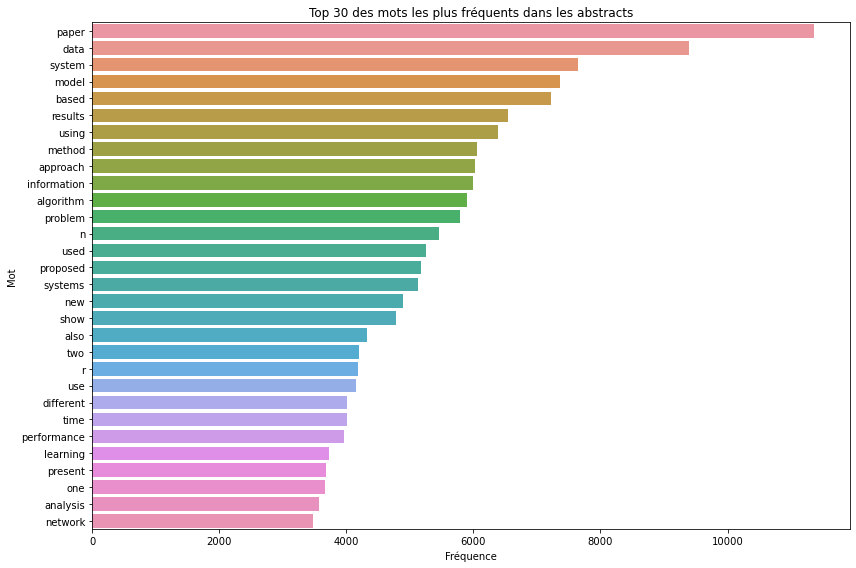

In [12]:
# Analyse basique du texte (abstracts)
if 'abstract' in df.columns:
    # Comptage du nombre de mots par abstract
    df['abstract_word_count'] = df['abstract'].fillna('').apply(lambda x: len(str(x).split()))
    
    print("\nStatistiques sur la longueur des abstracts (nombre de mots):")
    print(df['abstract_word_count'].describe())
    
    # Visualisation de la distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(df['abstract_word_count'], bins=30)
    plt.title('Distribution du nombre de mots dans les abstracts')
    plt.xlabel('Nombre de mots')
    plt.ylabel('Fréquence')
    plt.tight_layout()
    plt.savefig('abstract_length_distribution.png')
    plt.show()
    
    # Analyse des mots les plus fréquents
    stop_words = set(stopwords.words('english'))
    all_words = []
    
    for abstract in df['abstract'].dropna():
        words = word_tokenize(str(abstract).lower())
        words = [word for word in words if word.isalpha() and word not in stop_words]
        all_words.extend(words)
    
    word_counts = Counter(all_words)
    top_words = word_counts.most_common(30)
    
    print("\nTop 30 des mots les plus fréquents dans les abstracts:")
    for word, count in top_words:
        print(f"{word}: {count} occurrences")
    
    # Visualisation des mots les plus fréquents
    plt.figure(figsize=(12, 8))
    words_df = pd.DataFrame(top_words, columns=['Mot', 'Fréquence'])
    sns.barplot(x='Fréquence', y='Mot', data=words_df)
    plt.title('Top 30 des mots les plus fréquents dans les abstracts')
    plt.tight_layout()
    plt.savefig('top_words.png')
    plt.show()

## Fonction 2

In [14]:
pip install python-louvain

  Created wheel for python-louvain: filename=python_louvain-0.16-py3-none-any.whl size=9414 sha256=424ee9a2916aef00862b52b91fdcf669135fd03a68c909a9b756f420dba7f1f9
  Stored in directory: c:\users\odjen\appdata\local\pip\cache\wheels\4d\7c\b6\79b198e4ec43f915fbdf967953d48b89a18893b12aa9df0ae2
Successfully built python-louvain
Note: you may need to restart the kernel to use updated packages.


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from collections import Counter
import re
import community as community_louvain  
from sklearn.manifold import TSNE

In [20]:
# Configuration de l'affichage
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)

import seaborn as sns
sns.set_theme(style="whitegrid")
sns.set_context("notebook", font_scale=1.2)

In [66]:
# Chargement des données
df = pd.read_csv('C:/Users/odjen/Downloads/data_project.csv', sep='\t')
print(f"Données chargées: {df.shape[0]} documents")

Données chargées: 40596 documents



--- Construction d'un graphe à partir du DataFrame ---
Recherche des documents similaires avec KNN...
Traité 0/40596 documents, 10 arêtes créées
Traité 1000/40596 documents, 6028 arêtes créées
Traité 2000/40596 documents, 12613 arêtes créées
Traité 3000/40596 documents, 18797 arêtes créées
Traité 4000/40596 documents, 25106 arêtes créées
Traité 5000/40596 documents, 31803 arêtes créées
Traité 6000/40596 documents, 38198 arêtes créées
Traité 7000/40596 documents, 44299 arêtes créées
Traité 8000/40596 documents, 50590 arêtes créées
Traité 9000/40596 documents, 56522 arêtes créées
Traité 10000/40596 documents, 63484 arêtes créées
Traité 11000/40596 documents, 69457 arêtes créées
Traité 12000/40596 documents, 76008 arêtes créées
Traité 13000/40596 documents, 82204 arêtes créées
Traité 14000/40596 documents, 88656 arêtes créées
Traité 15000/40596 documents, 95000 arêtes créées
Traité 16000/40596 documents, 101134 arêtes créées
Traité 17000/40596 documents, 107453 arêtes créées
Traité 18000

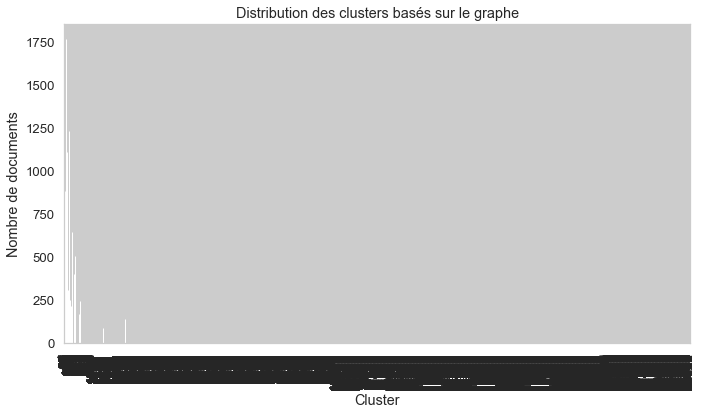

In [ ]:
print("\n--- Construction d'un graphe à partir du DataFrame ---")

# Prétraitons le texte si ce n'est pas déjà fait
if 'processed_abstract' not in df.columns and 'abstract' in df.columns:
    def preprocess_text(text):
        if pd.isna(text):
            return ""
        return str(text).lower()
    
    df['processed_abstract'] = df['abstract'].apply(preprocess_text)
    text_column = 'processed_abstract'
elif 'processed_abstract' in df.columns:
    text_column = 'processed_abstract'
elif 'abstract' in df.columns:
    text_column = 'abstract'
else:
    text_column = 'title'  # Utilisons le titre si pas d'abstract disponible

# Créons un nouveau graphe basé sur la similarité du contenu
import networkx as nx
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# 1. Créons un nouveau graphe
content_graph = nx.Graph()

# 2. Ajoutons les nœuds (documents) du DataFrame
content_graph.add_nodes_from(df['id'])


# 3. Ajoutons des attributs aux nœuds
for idx, row in df.iterrows():
    node_id = row['id']
    # Ajoutons les attributs disponibles
    for col in ['title', 'year', 'venue', 'class']:
        if col in df.columns and pd.notna(row[col]):
            content_graph.nodes[node_id][col] = row[col]

# 4. Créons des arêtes basées sur la similarité du contenu
# Import de la bibliothèque nécessaire
from sklearn.neighbors import NearestNeighbors

# Vectorisation TF-IDF 
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df[text_column].fillna(''))


print("Recherche des documents similaires avec KNN...")
k = 20  # Nombre de voisins à trouver pour chaque document
similarity_threshold = 0.3  # Seuil de similarité minimum

# Créons le modèle KNN
nn = NearestNeighbors(n_neighbors=min(k+1, len(df)), metric='cosine')
nn.fit(tfidf_matrix)

# Trouvons les voisins
distances, indices = nn.kneighbors(tfidf_matrix)

# Créons les arêtes
edge_count = 0
for i in range(len(df)):
    for j in range(1, min(k+1, len(indices[i]))):
        neighbor_idx = indices[i, j]
        similarity = 1 - distances[i, j]
        
        if similarity > similarity_threshold:
            content_graph.add_edge(df['id'].iloc[i], df['id'].iloc[neighbor_idx], weight=similarity)
            edge_count += 1
    
    # Affichons progression
    if i % 1000 == 0:
        print(f"Traité {i}/{len(df)} documents, {edge_count} arêtes créées")

print(f"Total: {edge_count} arêtes créées")
# 5. Analysons le nouveau graphe
print(f"\nGraphe basé sur le contenu créé avec {content_graph.number_of_nodes()} nœuds et {content_graph.number_of_edges()} arêtes")
print(f"Densité du graphe: {nx.density(content_graph):.6f}")

# Vérifions les composantes connexes
components = list(nx.connected_components(content_graph))
print(f"Nombre de composantes connexes: {len(components)}")
print(f"Taille de la plus grande composante: {len(max(components, key=len))}")

# 6. Détection de communautés avec l'algorithme de Louvain
import community as community_louvain

try:
    print("\nDétection de communautés avec l'algorithme de Louvain...")
    partition = community_louvain.best_partition(content_graph)
    communities = set(partition.values())
    print(f"Nombre de communautés détectées: {len(communities)}")
    
    # 7. Ajoutons les étiquettes de communauté au DataFrame
    df['graph_cluster'] = df['id'].map(partition).fillna(-1).astype(int)
    
    # Visualisons la distribution des clusters
    plt.figure(figsize=(10, 6))
    cluster_counts = df['graph_cluster'].value_counts().sort_index()
    cluster_counts.plot(kind='bar')
    plt.title('Distribution des clusters basés sur le graphe')
    plt.xlabel('Cluster')
    plt.ylabel('Nombre de documents')
    plt.tight_layout()
    plt.show()
    
    # 8. Sauvegardons le nouveau graphe
    nx.write_gpickle(content_graph, "content_graph.gpickle")
    
except Exception as e:
    print(f"Erreur lors de la détection de communautés: {str(e)}")


In [ ]:
# 1. Construction du graphe de citations
def construct_citation_graph(df):
    """
    Construit un graphe orienté où les nœuds sont les articles et les arêtes représentent les citations.
    
    Args:
        df: DataFrame contenant les colonnes 'id' et 'references'
        
    Returns:
        G: Graphe orienté NetworkX
    """
    # Créons un graphe orienté
    G = nx.DiGraph()
    
    # Ajoutons tous les articles comme nœuds
    for idx, row in df.iterrows():
        article_id = row['id']
        G.add_node(article_id)
        
        # Ajoutons des attributs au nœud
        for col in ['title', 'year', 'venue', 'class']:
            if col in df.columns:
                G.nodes[article_id][col] = row[col]
    
    # Ajoutons les citations comme arêtes
    if 'references' in df.columns:
        for idx, row in df.iterrows():
            article_id = row['id']
            references = str(row['references'])
            
            if pd.notna(references) and references.strip():
                # Divisons les références (ajustez le séparateur selon le format de vos données)
                ref_list = [ref.strip() for ref in references.split(',') if ref.strip()]
                
                for ref_id in ref_list:
                    # Vérifions si la référence est dans notre ensemble de données
                    if ref_id in G:
                        # Ajoutons une arête de l'article citant vers l'article cité
                        G.add_edge(article_id, ref_id)
    
    return G

In [ ]:
# Construisons le graphe de citations
citation_graph = construct_citation_graph(df)

In [72]:
# Informations de base sur le graphe
print(f"Nombre de nœuds: {citation_graph.number_of_nodes()}")
print(f"Nombre d'arêtes: {citation_graph.number_of_edges()}")
print(f"Densité du graphe: {nx.density(citation_graph):.6f}")

Nombre de nœuds: 40596
Nombre d'arêtes: 0
Densité du graphe: 0.000000


In [ ]:
# 2. Construction du graphe de co-autorat
def construct_coauthorship_graph(df):
    """
    Construit un graphe non orienté où les nœuds sont les auteurs et les arêtes représentent la co-écriture d'articles.
    
    Args:
        df: DataFrame contenant la colonne 'authors'
        
    Returns:
        G: Graphe non orienté NetworkX
    """
    # Créons un graphe non orienté
    G = nx.Graph()
    
    # Vérifions que la colonne 'authors' existe
    if 'authors' not in df.columns:
        print("La colonne 'authors' n'existe pas dans le DataFrame")
        return G
    
    # Parcourons chaque article
    for idx, row in df.iterrows():
        authors = row['authors']
        
        if pd.notna(authors) and authors.strip():
            # Divisons la liste des auteurs (ajustez le séparateur selon le format)
            author_list = [author.strip() for author in re.split(r'[,;]', authors) if author.strip()]
            
            # Ajoutons chaque auteur comme nœud s'il n'existe pas déjà
            for author in author_list:
                if author not in G:
                    G.add_node(author)
                    
                # Ajoutons un attribut pour compter les articles
                if 'article_count' not in G.nodes[author]:
                    G.nodes[author]['article_count'] = 1
                else:
                    G.nodes[author]['article_count'] += 1
            
            # Ajoutons des arêtes entre chaque paire d'auteurs
            for i in range(len(author_list)):
                for j in range(i+1, len(author_list)):
                    author1 = author_list[i]
                    author2 = author_list[j]
                    
                    # Si l'arête existe déjà, augmenter son poids
                    if G.has_edge(author1, author2):
                        G[author1][author2]['weight'] += 1
                    else:
                        G.add_edge(author1, author2, weight=1)
    
    return G

# Construisons le graphe de co-autorat
coauthorship_graph = construct_coauthorship_graph(df)

# Informations de base sur le graphe
print(f"Nombre d'auteurs (nœuds): {coauthorship_graph.number_of_nodes()}")
print(f"Nombre de relations de co-autorat (arêtes): {coauthorship_graph.number_of_edges()}")
print(f"Densité du graphe: {nx.density(coauthorship_graph):.6f}")

Nombre d'auteurs (nœuds): 95726
Nombre de relations de co-autorat (arêtes): 148025
Densité du graphe: 0.000032


In [ ]:
# 3. Construction d'un graphe bipartite
def construct_bipartite_graph(df):
    """
    Construit un graphe bipartite où un ensemble de nœuds sont les articles
    et l'autre ensemble sont les auteurs.
    
    Args:
        df: DataFrame contenant les colonnes 'id' et 'authors'
        
    Returns:
        G: Graphe bipartite NetworkX
        article_nodes: Ensemble des identifiants d'articles
        author_nodes: Ensemble des identifiants d'auteurs
    """
    # Créons un graphe non orienté
    G = nx.Graph()
    
    # Ensembles pour suivre les différents types de nœuds
    article_nodes = set()
    author_nodes = set()
    
    # Vérifions que les colonnes nécessaires existent
    if 'id' not in df.columns or 'authors' not in df.columns:
        print("Les colonnes 'id' ou 'authors' n'existent pas dans le DataFrame")
        return G, article_nodes, author_nodes
    
    # Ajoutons les articles comme nœuds
    for idx, row in df.iterrows():
        article_id = row['id']
        G.add_node(article_id, type='article')
        article_nodes.add(article_id)
        
        # Ajoutons des attributs au nœud
        for col in ['title', 'year', 'venue', 'class']:
            if col in df.columns:
                G.nodes[article_id][col] = row[col]
        
        # Ajoutons les auteurs et les relations
        authors = row['authors']
        
        if pd.notna(authors) and authors.strip():
            author_list = [author.strip() for author in re.split(r'[,;]', authors) if author.strip()]
            
            for author in author_list:
                if author not in G:
                    G.add_node(author, type='author')
                    author_nodes.add(author)
                
                # Ajoutons une arête entre l'article et l'auteur
                G.add_edge(article_id, author)
    
    return G, article_nodes, author_nodes

# Construisons le graphe bipartite
bipartite_graph, article_nodes, author_nodes = construct_bipartite_graph(df)

# Informations de base sur le graphe
print(f"Nombre total de nœuds: {bipartite_graph.number_of_nodes()}")
print(f"Nombre d'articles: {len(article_nodes)}")
print(f"Nombre d'auteurs: {len(author_nodes)}")
print(f"Nombre d'arêtes: {bipartite_graph.number_of_edges()}")
print(f"Densité du graphe: {nx.density(bipartite_graph):.6f}")


Nombre total de nœuds: 136322
Nombre d'articles: 40596
Nombre d'auteurs: 95726
Nombre d'arêtes: 115757
Densité du graphe: 0.000012


Nombre de composantes connexes: 24473
Taille de la plus grande composante: 8955
Taille de la plus petite composante: 1


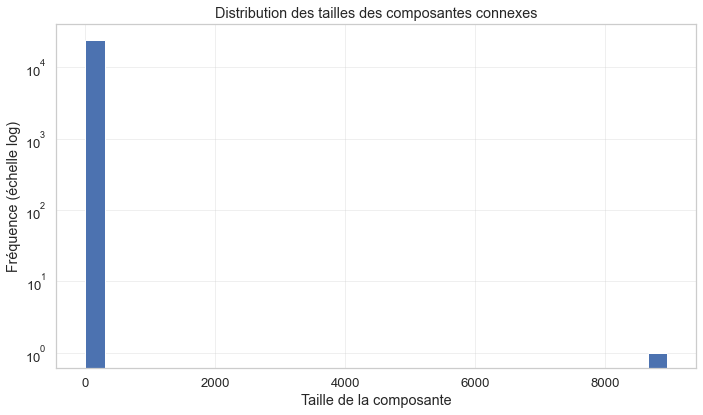

In [75]:
# 4. Analyse des propriétés du graphe

# G = citation_graph
G = coauthorship_graph
# G = bipartite_graph

# 4.1 Analyse des composantes connexes
if nx.is_directed(G):
    # Composantes faiblement connexes
    weak_components = list(nx.weakly_connected_components(G))
    n_weak_components = len(weak_components)
    sizes_weak = [len(c) for c in weak_components]
    
    print(f"Nombre de composantes faiblement connexes: {n_weak_components}")
    print(f"Taille de la plus grande composante: {max(sizes_weak)}")
    print(f"Taille de la plus petite composante: {min(sizes_weak)}")
    
    # Distribution des tailles des composantes
    plt.figure(figsize=(10, 6))
    plt.hist(sizes_weak, bins=30, log=True)
    plt.title('Distribution des tailles des composantes faiblement connexes')
    plt.xlabel('Taille de la composante')
    plt.ylabel('Fréquence (échelle log)')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Composantes fortement connexes
    strong_components = list(nx.strongly_connected_components(G))
    n_strong_components = len(strong_components)
    sizes_strong = [len(c) for c in strong_components]
    
    print(f"Nombre de composantes fortement connexes: {n_strong_components}")
    print(f"Taille de la plus grande composante: {max(sizes_strong)}")
    print(f"Taille de la plus petite composante: {min(sizes_strong)}")
    
    # Distribution des tailles des composantes
    plt.figure(figsize=(10, 6))
    plt.hist(sizes_strong, bins=30, log=True)
    plt.title('Distribution des tailles des composantes fortement connexes')
    plt.xlabel('Taille de la composante')
    plt.ylabel('Fréquence (échelle log)')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    # Composantes connexes pour un graphe non orienté
    components = list(nx.connected_components(G))
    n_components = len(components)
    sizes = [len(c) for c in components]
    
    print(f"Nombre de composantes connexes: {n_components}")
    print(f"Taille de la plus grande composante: {max(sizes)}")
    print(f"Taille de la plus petite composante: {min(sizes)}")
    
    # Distribution des tailles des composantes
    plt.figure(figsize=(10, 6))
    plt.hist(sizes, bins=30, log=True)
    plt.title('Distribution des tailles des composantes connexes')
    plt.xlabel('Taille de la composante')
    plt.ylabel('Fréquence (échelle log)')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

In [ ]:
# 4.2 Extraction de la plus grande composante
if nx.is_directed(G):
    largest_cc = max(nx.weakly_connected_components(G), key=len)
else:
    largest_cc = max(nx.connected_components(G), key=len)

# Créons un sous-graphe avec seulement cette composante
G_lcc = G.subgraph(largest_cc).copy()

print(f"Graphe original: {G.number_of_nodes()} nœuds, {G.number_of_edges()} arêtes")
print(f"Plus grande composante: {G_lcc.number_of_nodes()} nœuds, {G_lcc.number_of_edges()} arêtes")
print(f"Pourcentage de nœuds dans la plus grande composante: {G_lcc.number_of_nodes() / G.number_of_nodes() * 100:.2f}%")


Graphe original: 95726 nœuds, 148025 arêtes
Plus grande composante: 8955 nœuds, 22404 arêtes
Pourcentage de nœuds dans la plus grande composante: 9.35%


In [ ]:
# 4.3 Mesures de centralité
G_analysis = G_lcc

# Limitons le nombre de nœuds pour les calculs intensifs
if G_analysis.number_of_nodes() > 1000:
    print("Le graphe est très grand, certains calculs peuvent prendre du temps...")


Le graphe est très grand, certains calculs peuvent prendre du temps...


In [32]:
pip install --upgrade scipy

  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Centralité de degré
degree_centrality = nx.degree_centrality(G_analysis)
if nx.is_directed(G_analysis):
    in_degree_centrality = nx.in_degree_centrality(G_analysis)
    out_degree_centrality = nx.out_degree_centrality(G_analysis)

# PageRank avec gestion d'erreur
try:
    # Essayons d'utiliser PageRank standard
    pagerank = nx.pagerank(G_analysis, alpha=0.85)
except AttributeError:
    try:
        # Alternative 1: Utilisons l'implémentation numpy de PageRank
        pagerank = nx.pagerank_numpy(G_analysis, alpha=0.85)
    except:
        try:
            # Alternative 2: Utilisons la centralité de vecteur propre
            print("PageRank a échoué. Utilisation de la centralité de vecteur propre à la place.")
            pagerank = nx.eigenvector_centrality_numpy(G_analysis)
        except:
            # Alternative 3: Utilisons la centralité de degré comme dernière option
            print("Toutes les alternatives ont échoué. Utilisation de la centralité de degré à la place de PageRank.")
            pagerank = degree_centrality

# Centralité d'intermédiarité (betweenness) - peut être lent pour de grands graphes
if G_analysis.number_of_nodes() <= 1000:
    betweenness_centrality = nx.betweenness_centrality(G_analysis, k=min(100, G_analysis.number_of_nodes()))
else:
    print("Calcul de la centralité d'intermédiarité sur un échantillon de nœuds...")
    betweenness_centrality = nx.betweenness_centrality(G_analysis, k=100)  # Approximation

# Centralité de proximité (closeness) - peut être lent pour de grands graphes
if G_analysis.number_of_nodes() <= 1000:
    closeness_centrality = nx.closeness_centrality(G_analysis)
else:
    print("Calcul de la centralité de proximité ignoré (trop de nœuds)")
    closeness_centrality = {}

# Créons un DataFrame avec toutes les mesures de centralité
centrality_df = pd.DataFrame()
centrality_df['degree'] = pd.Series(degree_centrality)

if nx.is_directed(G_analysis):
    centrality_df['in_degree'] = pd.Series(in_degree_centrality)
    centrality_df['out_degree'] = pd.Series(out_degree_centrality)

centrality_df['pagerank'] = pd.Series(pagerank)
centrality_df['betweenness'] = pd.Series(betweenness_centrality)

if closeness_centrality:
    centrality_df['closeness'] = pd.Series(closeness_centrality)

# Trions par PageRank décroissant
centrality_df = centrality_df.sort_values('pagerank', ascending=False)

# Affichons les 20 nœuds les plus centraux selon PageRank
print("Top 20 des nœuds selon PageRank:")
print(centrality_df.head(20))


Calcul de la centralité d'intermédiarité sur un échantillon de nœuds...
Calcul de la centralité de proximité ignoré (trop de nœuds)
Top 20 des nœuds selon PageRank:
                          degree  pagerank  betweenness
'br'                    0.011057  0.001738     0.036692
'John H. L. Hansen']    0.003686  0.001201     0.003910
'Hermann Ney']          0.005026  0.001158     0.005809
'Helmut Krcmar']        0.004021  0.001011     0.013350
'Kaoru Hirota']         0.004691  0.000962     0.007503
'Jianzhong Li'          0.004132  0.000819     0.006758
'Shrikanth Narayanan']  0.004356  0.000783     0.037120
'Jun Sun'               0.004021  0.000768     0.021793
'Bo Xu']                0.003686  0.000754     0.122768
'Lei Zhang'             0.005137  0.000743     0.217869
'Satoshi Nakamura']     0.003686  0.000719     0.083761
'Henri Prade']          0.002792  0.000718     0.004355
'Bin Ma'                0.003686  0.000701     0.026585
'Yang Liu'              0.003462  0.000699     0.00

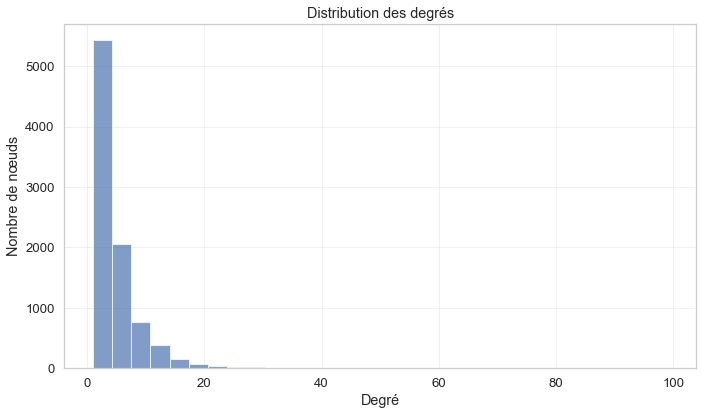

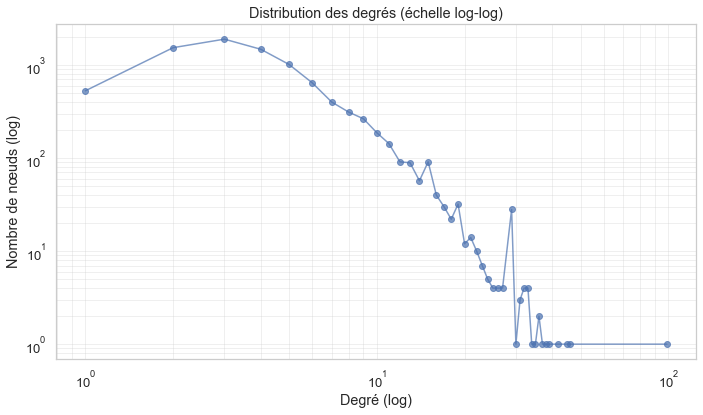

In [79]:
# Distribution des degrés
if nx.is_directed(G_analysis):
    in_degrees = [d for n, d in G_analysis.in_degree()]
    out_degrees = [d for n, d in G_analysis.out_degree()]
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Distribution des degrés entrants
    axes[0].hist(in_degrees, bins=30, alpha=0.7)
    axes[0].set_title('Distribution des degrés entrants')
    axes[0].set_xlabel('Degré entrant')
    axes[0].set_ylabel('Nombre de nœuds')
    axes[0].grid(True, alpha=0.3)
    
    # Distribution des degrés sortants
    axes[1].hist(out_degrees, bins=30, alpha=0.7)
    axes[1].set_title('Distribution des degrés sortants')
    axes[1].set_xlabel('Degré sortant')
    axes[1].set_ylabel('Nombre de nœuds')
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Distribution log-log pour vérifier la loi de puissance
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Degrés entrants
    in_degree_counts = Counter(in_degrees)
    x_in = sorted(in_degree_counts.keys())
    y_in = [in_degree_counts[x] for x in x_in]
    
    axes[0].loglog(x_in, y_in, 'bo-', alpha=0.7)
    axes[0].set_title('Distribution des degrés entrants (échelle log-log)')
    axes[0].set_xlabel('Degré entrant (log)')
    axes[0].set_ylabel('Nombre de nœuds (log)')
    axes[0].grid(True, alpha=0.3, which='both')
    
    # Degrés sortants
    out_degree_counts = Counter(out_degrees)
    x_out = sorted(out_degree_counts.keys())
    y_out = [out_degree_counts[x] for x in x_out]
    
    axes[1].loglog(x_out, y_out, 'ro-', alpha=0.7)
    axes[1].set_title('Distribution des degrés sortants (échelle log-log)')
    axes[1].set_xlabel('Degré sortant (log)')
    axes[1].set_ylabel('Nombre de nœuds (log)')
    axes[1].grid(True, alpha=0.3, which='both')
    
    plt.tight_layout()
    plt.show()
else:
    degrees = [d for n, d in G_analysis.degree()]
    
    plt.figure(figsize=(10, 6))
    plt.hist(degrees, bins=30, alpha=0.7)
    plt.title('Distribution des degrés')
    plt.xlabel('Degré')
    plt.ylabel('Nombre de nœuds')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Distribution log-log
    degree_counts = Counter(degrees)
    x = sorted(degree_counts.keys())
    y = [degree_counts[d] for d in x]
    
    plt.figure(figsize=(10, 6))
    plt.loglog(x, y, 'bo-', alpha=0.7)
    plt.title('Distribution des degrés (échelle log-log)')
    plt.xlabel('Degré (log)')
    plt.ylabel('Nombre de nœuds (log)')
    plt.grid(True, alpha=0.3, which='both')
    plt.tight_layout()
    plt.show()


Le graphe est trop grand pour une visualisation complète. Considérez un échantillonnage.
Échantillon de graphe: 500 nœuds, 444 arêtes


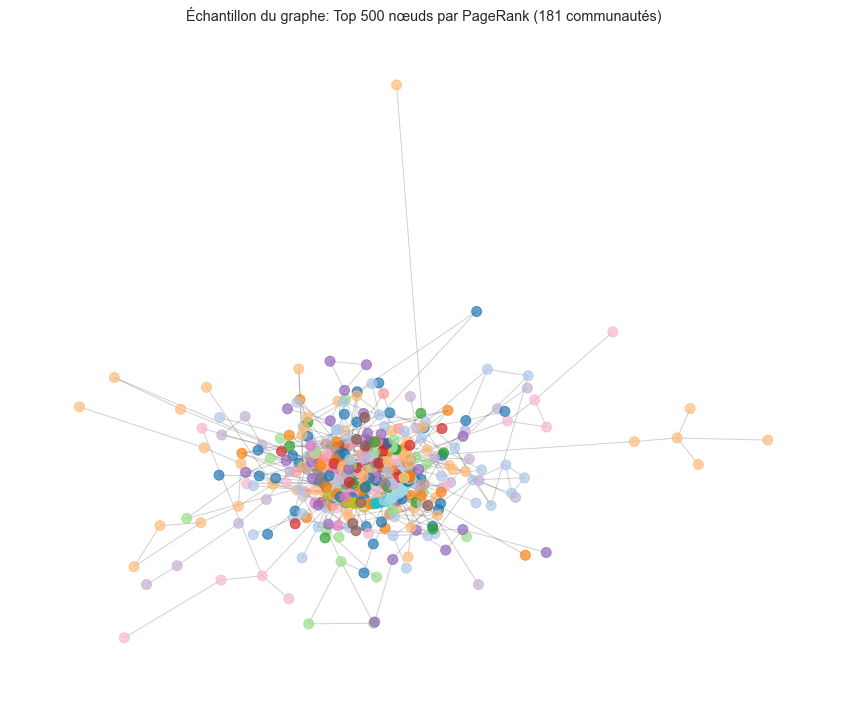

In [ ]:
# 5. Visualisation du graphe
# Pour des graphes de taille moyenne (< 1000 nœuds)
if G_analysis.number_of_nodes() <= 1000:
    # Détection de communautés avec l'algorithme de Louvain
    partition = community_louvain.best_partition(G_analysis.to_undirected())
    
    # Convertissons les valeurs de partition en une liste de couleurs
    communities = set(partition.values())
    mapping = dict(zip(sorted(communities), range(len(communities))))
    node_colors = [mapping[partition[node]] for node in G_analysis.nodes()]
    
    # Utilisons une méthode de positionnement alternative plus simple
    print("Calcul de la disposition du graphe...")
    
    try:
        # Essayons d'abord kamada_kawai_layout
        pos = nx.kamada_kawai_layout(G_analysis)
    except:
        try:
            # Sinon essayons fruchterman_reingold_layout
            pos = nx.fruchterman_reingold_layout(G_analysis)
        except:
            # Si tout échoue, utilisons circular_layout
            print("Utilisation d'une disposition circulaire simple...")
            pos = nx.circular_layout(G_analysis)
    
    # Visualisons le graphe avec les communautés en couleur
    plt.figure(figsize=(12, 10))
    nx.draw_networkx_nodes(G_analysis, pos, node_size=50, alpha=0.7, node_color=node_colors, cmap='tab20')
    nx.draw_networkx_edges(G_analysis, pos, alpha=0.1)
    
    plt.title(f'Visualisation du graphe avec {len(communities)} communautés détectées')
    plt.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("Le graphe est trop grand pour une visualisation complète. Considérez un échantillonnage.")
    
    # Échantillonnage pour grands graphes
    if G_analysis.number_of_nodes() > 1000:
        # Sélectionnons les 500 nœuds avec le PageRank le plus élevé
        top_nodes = centrality_df.head(500).index.tolist()
        G_sample = G_analysis.subgraph(top_nodes).copy()
        
        print(f"Échantillon de graphe: {G_sample.number_of_nodes()} nœuds, {G_sample.number_of_edges()} arêtes")
        
        # Détection de communautés sur l'échantillon
        partition = community_louvain.best_partition(G_sample.to_undirected())
        communities = set(partition.values())
        mapping = dict(zip(sorted(communities), range(len(communities))))
        node_colors = [mapping[partition[node]] for node in G_sample.nodes()]
        
        # Layout pour l'échantillon - utiliser des méthodes alternatives
        try:
            pos = nx.kamada_kawai_layout(G_sample)
        except:
            try:
                pos = nx.fruchterman_reingold_layout(G_sample)
            except:
                print("Utilisation d'une disposition circulaire simple...")
                pos = nx.circular_layout(G_sample)
        
        # Visualisation
        plt.figure(figsize=(12, 10))
        nx.draw_networkx_nodes(G_sample, pos, node_size=100, alpha=0.7, node_color=node_colors, cmap='tab20')
        nx.draw_networkx_edges(G_sample, pos, alpha=0.2)
        
        plt.title(f'Échantillon du graphe: Top 500 nœuds par PageRank ({len(communities)} communautés)')
        plt.axis('off')
        plt.tight_layout()
        plt.show()

In [81]:
# 6. Sauvegarde du graphe pour les étapes suivantes
nx.write_gpickle(G_lcc, "largest_component.gpickle")

print("Analyse du graphe terminée.")

Analyse du graphe terminée.


## Fonction 3

In [92]:
# Import des bibliothèques nécessaires
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re
import warnings
warnings.filterwarnings('ignore')

In [93]:
# Téléchargement des ressources NLTK
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')
    nltk.download('punkt')

In [94]:
# Chargement des données
# Si vous avez sauvegardé vos données avec les clusters
df = pd.read_csv('data_with_clusters.csv')
print(f"Données chargées: {df.shape[0]} documents")


Données chargées: 40596 documents


In [ ]:
# Chargement du graphe
try:
    G = nx.read_gpickle("content_graph.gpickle")
    print(f"Graphe chargé: {G.number_of_nodes()} nœuds, {G.number_of_edges()} arêtes")
    graph_available = True
except:
    print("Graphe non trouvé. Utilisation uniquement de la recherche basée sur le contenu.")
    graph_available = False

# Vérifions la colonne de texte
if 'processed_abstract' in df.columns:
    text_column = 'processed_abstract'
elif 'abstract' in df.columns:
    text_column = 'abstract'
else:
    text_column = 'title'

print(f"Utilisation de la colonne '{text_column}' pour la recherche textuelle")


Graphe chargé: 40596 nœuds, 182309 arêtes
Utilisation de la colonne 'processed_abstract' pour la recherche textuelle


In [96]:
# 1. Approche basique avec TF-IDF
print("\nCréation de l'index TF-IDF...")
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df[text_column].fillna(''))

def search_tfidf(query, top_k=10):
    """
    Recherche basique basée sur TF-IDF et similarité cosinus.
    
    Args:
        query: Texte de la requête
        top_k: Nombre de résultats à retourner
        
    Returns:
        DataFrame contenant les top_k résultats les plus pertinents
    """
    # Prétraitement de la requête
    query = str(query).lower()
    
    # Vectorisation de la requête
    query_vector = tfidf_vectorizer.transform([query])
    
    # Calcul de la similarité avec tous les documents
    similarity_scores = cosine_similarity(query_vector, tfidf_matrix).flatten()
    
    # Tri des résultats par pertinence
    top_indices = similarity_scores.argsort()[-top_k:][::-1]
    
    # Création du DataFrame résultat
    results = df.iloc[top_indices].copy()
    results['similarity_score'] = similarity_scores[top_indices]
    
    return results[['id', 'title', 'similarity_score'] + 
                  (['abstract'] if 'abstract' in df.columns else []) + 
                  (['class'] if 'class' in df.columns else [])]



Création de l'index TF-IDF...


In [ ]:
# 2. Méthode combinant contenu et structure du graphe 
def search_graph_enhanced(query, alpha=0.5, top_k=10, personalization_weight=0.5, max_iterations=20):
    """
    Recherche améliorée combinant TF-IDF et structure du graphe.
    
    Args:
        query: Texte de la requête
        alpha: Poids relatif entre contenu (TF-IDF) et structure (graphe)
        top_k: Nombre de résultats à retourner
        personalization_weight: Poids pour le PageRank personnalisé
        max_iterations: Nombre maximum d'itérations pour la propagation
        
    Returns:
        DataFrame contenant les top_k résultats les plus pertinents
    """
    # Vérifions si le graphe est disponible
    if not graph_available:
        print("Graphe non disponible. Utilisation de la recherche basique TF-IDF.")
        return search_tfidf(query, top_k)
    
    # 1. Obtenons les scores initiaux avec TF-IDF
    query = str(query).lower()
    query_vector = tfidf_vectorizer.transform([query])
    tfidf_scores = cosine_similarity(query_vector, tfidf_matrix).flatten()
    
    # 2. Normalisons les scores TF-IDF
    if tfidf_scores.max() > 0:
        tfidf_scores = tfidf_scores / tfidf_scores.max()
    
    # 3. Créons un dictionnaire de scores pour tous les documents
    node_scores = {doc_id: tfidf_scores[i] for i, doc_id in enumerate(df['id']) if doc_id in G}
    
    # 4. PageRank personnalisé
    try:
        # Initialisons le vecteur de personnalisation avec les scores TF-IDF
        personalization = {node: node_scores.get(node, 0) for node in G.nodes()}
        
        # Calculons PageRank personnalisé
        pagerank_scores = nx.pagerank(G, alpha=personalization_weight, personalization=personalization, max_iter=max_iterations)
        
        # 5. Combinons les scores TF-IDF et PageRank
        combined_scores = np.zeros(len(df))
        for i, doc_id in enumerate(df['id']):
            tfidf_score = tfidf_scores[i]
            pr_score = pagerank_scores.get(doc_id, 0)
            combined_scores[i] = alpha * tfidf_score + (1 - alpha) * pr_score
    except Exception as e:
        print(f"Erreur lors du calcul de PageRank: {str(e)}")
        print("Utilisation des scores TF-IDF uniquement.")
        combined_scores = tfidf_scores
    
    # 6. Tri des résultats par pertinence
    top_indices = combined_scores.argsort()[-top_k:][::-1]
    
    # 7. Création du DataFrame résultat
    results = df.iloc[top_indices].copy()
    results['similarity_score'] = combined_scores[top_indices]
    
    return results[['id', 'title', 'similarity_score'] + 
                  (['abstract'] if 'abstract' in df.columns else []) + 
                  (['class'] if 'class' in df.columns else [])]


In [ ]:
# 3. Intégration du clustering dans la recherche
def search_with_cluster_boost(query, top_k=10, cluster_weight=0.2):
    """
    Recherche qui booste les résultats appartenant aux mêmes clusters que les premiers résultats.
    
    Args:
        query: Texte de la requête
        top_k: Nombre de résultats à retourner
        cluster_weight: Poids accordé au boost de cluster
        
    Returns:
        DataFrame contenant les top_k résultats les plus pertinents
    """
    if 'graph_cluster' not in df.columns and 'text_cluster' not in df.columns:
        print("Pas d'information de cluster disponible. Utilisation de la recherche standard.")
        return search_tfidf(query, top_k)
    
    # Commencons avec une recherche TF-IDF standard
    query = str(query).lower()
    query_vector = tfidf_vectorizer.transform([query])
    tfidf_scores = cosine_similarity(query_vector, tfidf_matrix).flatten()
    
    # Obtenons les clusters des premiers résultats
    initial_top_n = 5  # Nombre de premiers résultats à considérer
    initial_top_indices = tfidf_scores.argsort()[-initial_top_n:][::-1]
    
    relevant_clusters = []
    if 'graph_cluster' in df.columns:
        top_graph_clusters = df.iloc[initial_top_indices]['graph_cluster'].value_counts().index.tolist()
        relevant_clusters.extend([(cluster, 'graph_cluster') for cluster in top_graph_clusters])
    
    if 'text_cluster' in df.columns:
        top_text_clusters = df.iloc[initial_top_indices]['text_cluster'].value_counts().index.tolist()
        relevant_clusters.extend([(cluster, 'text_cluster') for cluster in top_text_clusters])
    
    # Boostons les scores des documents appartenant aux clusters pertinents
    boosted_scores = tfidf_scores.copy()
    for cluster, cluster_type in relevant_clusters:
        for i, idx in enumerate(df.index):
            if df.loc[idx, cluster_type] == cluster:
                boosted_scores[i] += cluster_weight * tfidf_scores[i]
    
    # Tri des résultats finaux
    top_indices = boosted_scores.argsort()[-top_k:][::-1]
    
    # Création du DataFrame résultat
    results = df.iloc[top_indices].copy()
    results['similarity_score'] = boosted_scores[top_indices]
    
    return results[['id', 'title', 'similarity_score'] + 
                  (['abstract'] if 'abstract' in df.columns else []) + 
                  (['class'] if 'class' in df.columns else []) +
                  (['graph_cluster'] if 'graph_cluster' in df.columns else []) +
                  (['text_cluster'] if 'text_cluster' in df.columns else [])]


In [ ]:
# Interface unifiée pour le moteur de recherche
def search_engine(query, method='combined', top_k=10, **kwargs):
    """
    Interface unifiée pour le moteur de recherche.
    
    Args:
        query: Texte de la requête
        method: 'tfidf', 'graph', ou 'cluster' (méthodes de recherche)
        top_k: Nombre de résultats à retourner
        **kwargs: Paramètres supplémentaires spécifiques à chaque méthode
        
    Returns:
        DataFrame contenant les top_k résultats les plus pertinents
    """
    if method == 'tfidf':
        return search_tfidf(query, top_k)
    elif method == 'graph':
        alpha = kwargs.get('alpha', 0.6)
        personalization_weight = kwargs.get('personalization_weight', 0.85)
        return search_graph_enhanced(query, alpha, top_k, personalization_weight)
    elif method == 'cluster':
        cluster_weight = kwargs.get('cluster_weight', 0.2)
        return search_with_cluster_boost(query, top_k, cluster_weight)
    elif method == 'combined':
        # Méthode qui combine la méthode graph et cluster
        if graph_available:
            alpha = kwargs.get('alpha', 0.6)
            personalization_weight = kwargs.get('personalization_weight', 0.85)
            graph_results = search_graph_enhanced(query, alpha, top_k*2, personalization_weight)
            
            # Réordonnancons en utilisant l'information de cluster si disponible
            if 'graph_cluster' in df.columns or 'text_cluster' in df.columns:
                cluster_weight = kwargs.get('cluster_weight', 0.2)
                combined_results = search_with_cluster_boost(query, top_k*2, cluster_weight)
                
                # Fusionnons les deux ensembles de résultats
                merged_ids = pd.concat([graph_results['id'], combined_results['id']]).drop_duplicates()
                final_results = df[df['id'].isin(merged_ids)].copy()
                
                # Réordonnons selon le score moyen
                graph_scores = dict(zip(graph_results['id'], graph_results['similarity_score']))
                cluster_scores = dict(zip(combined_results['id'], combined_results['similarity_score']))
                
                final_results['similarity_score'] = final_results['id'].apply(
                    lambda x: ((graph_scores.get(x, 0) + cluster_scores.get(x, 0)) / 2) 
                              if x in graph_scores and x in cluster_scores 
                              else (graph_scores.get(x, 0) if x in graph_scores else cluster_scores.get(x, 0))
                )
                
                return final_results.sort_values('similarity_score', ascending=False).head(top_k)
            else:
                return graph_results.head(top_k)
        else:
            # Si le graphe n'est pas disponible, utilisons le boost par cluster
            if 'graph_cluster' in df.columns or 'text_cluster' in df.columns:
                cluster_weight = kwargs.get('cluster_weight', 0.2)
                return search_with_cluster_boost(query, top_k, cluster_weight)
            else:
                # Si aucune information avancée n'est disponible, utilisons TF-IDF
                return search_tfidf(query, top_k)
    else:
        raise ValueError("Méthode non reconnue. Utilisez 'tfidf', 'graph', 'cluster' ou 'combined'.")

# Interface interactive pour tester le moteur de recherche
def interactive_search():
    print("\n=== Moteur de recherche pour le corpus ===")
    print(f"Corpus contient {len(df)} documents")
    print("Type 'exit' pour quitter")
    
    while True:
        query = input("\nEntrez votre requête: ")
        if query.lower() == 'exit':
            break
        
        print("\nMéthodes disponibles:")
        print("1. TF-IDF (recherche basique)")
        print("2. Graphe (avec structure)")
        print("3. Cluster (avec boost par cluster)")
        print("4. Combinée (tous les signaux)")
        
        try:
            method_choice = int(input("Choisissez une méthode (1-4): "))
            method = ['tfidf', 'graph', 'cluster', 'combined'][method_choice-1]
        except:
            method = 'combined'
            print("Choix non valide. Utilisation de la méthode combinée par défaut.")
        
        top_k = 5
        try:
            top_k = int(input(f"Nombre de résultats à afficher (défaut: {top_k}): "))
        except:
            pass
        
        print(f"\nRecherche pour: '{query}' avec la méthode '{method}'")
        try:
            results = search_engine(query, method=method, top_k=top_k)
            
            print(f"\n{len(results)} résultats trouvés:")
            for i, (idx, row) in enumerate(results.iterrows()):
                print(f"{i+1}. [{row['similarity_score']:.4f}] {row['title']}")
                if 'abstract' in row and not pd.isna(row['abstract']):
                    abstract = row['abstract']
                    if len(abstract) > 150:
                        abstract = abstract[:150] + "..."
                    print(f"   {abstract}")
                if 'class' in row:
                    print(f"   Classe: {row['class']}")
                if 'graph_cluster' in row:
                    print(f"   Cluster graphe: {row['graph_cluster']}")
                if 'text_cluster' in row:
                    print(f"   Cluster texte: {row['text_cluster']}")
                print()
        except Exception as e:
            print(f"Erreur lors de la recherche: {str(e)}")



In [ ]:
# Testons le moteur de recherche avec quelques requêtes
if __name__ == "__main__":
    print("\n=== Test du moteur de recherche avec quelques requêtes ===")
    
    test_queries = [
        "machine learning algorithms",
        "network analysis social media",
        "information retrieval"
    ]
    
    for query in test_queries:
        print(f"\n\n===== Recherche pour: '{query}' =====")
        
        # Test de la méthode TF-IDF
        print("\n--- Méthode TF-IDF ---")
        results_tfidf = search_engine(query, method='tfidf', top_k=3)
        for i, (idx, row) in enumerate(results_tfidf.iterrows()):
            print(f"{i+1}. [{row['similarity_score']:.4f}] {row['title']}")
        
        # Test de la méthode graphe si disponible
        if graph_available:
            print("\n--- Méthode Graphe ---")
            try:
                results_graph = search_engine(query, method='graph', top_k=3)
                for i, (idx, row) in enumerate(results_graph.iterrows()):
                    print(f"{i+1}. [{row['similarity_score']:.4f}] {row['title']}")
            except Exception as e:
                print(f"Erreur avec la méthode graphe: {str(e)}")
        
        # Test de la méthode cluster si disponible
        if 'graph_cluster' in df.columns or 'text_cluster' in df.columns:
            print("\n--- Méthode Cluster ---")
            try:
                results_cluster = search_engine(query, method='cluster', top_k=3)
                for i, (idx, row) in enumerate(results_cluster.iterrows()):
                    print(f"{i+1}. [{row['similarity_score']:.4f}] {row['title']}")
            except Exception as e:
                print(f"Erreur avec la méthode cluster: {str(e)}")
        
        # Test de la méthode combinée
        print("\n--- Méthode Combinée ---")
        try:
            results_combined = search_engine(query, method='combined', top_k=3)
            for i, (idx, row) in enumerate(results_combined.iterrows()):
                print(f"{i+1}. [{row['similarity_score']:.4f}] {row['title']}")
        except Exception as e:
            print(f"Erreur avec la méthode combinée: {str(e)}")
    
    # Proposons l'interface interactive
    interactive = input("\nVoulez-vous utiliser l'interface interactive de recherche? (o/n): ")
    if interactive.lower() in ['o', 'oui', 'y', 'yes']:
        interactive_search()


=== Test du moteur de recherche avec quelques requêtes ===


===== Recherche pour: 'machine learning algorithms' =====

--- Méthode TF-IDF ---
1. [0.6170] ASV monitor: creating comparability of machine learning methods for content analysis
2. [0.5436] Machine learning and agents
3. [0.4880] DICE: a discovery environment integrating inductive bias

--- Méthode Graphe ---
Erreur lors du calcul de PageRank: module 'scipy.sparse' has no attribute 'coo_array'
Utilisation des scores TF-IDF uniquement.
1. [1.0000] ASV monitor: creating comparability of machine learning methods for content analysis
2. [0.8809] Machine learning and agents
3. [0.7908] DICE: a discovery environment integrating inductive bias

--- Méthode Cluster ---
1. [0.7404] ASV monitor: creating comparability of machine learning methods for content analysis
2. [0.6523] Machine learning and agents
3. [0.5855] DICE: a discovery environment integrating inductive bias

--- Méthode Combinée ---
Erreur lors du calcul de PageRank: 

KeyboardInterrupt: Interrupted by user

## Fonction 4 

In [101]:
# Import des bibliothèques nécessaires
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.decomposition import TruncatedSVD, NMF
from sklearn.metrics import silhouette_score, adjusted_rand_score, adjusted_mutual_info_score
from sklearn.manifold import TSNE
import community as community_louvain
import nltk
from nltk.corpus import stopwords
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

print("\n--- Clustering basé sur le contenu textuel ---")


--- Clustering basé sur le contenu textuel ---


In [ ]:
# Préparons les données textuelles
if 'processed_abstract' in df.columns:
    text_column = 'processed_abstract'
elif 'abstract' in df.columns:
    text_column = 'abstract'
else:
    text_column = 'title'

In [ ]:
# Créons la matrice TF-IDF
print("Vectorisation des documents...")
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df[text_column].fillna(''))
print(f"Matrice TF-IDF: {tfidf_matrix.shape[0]} documents x {tfidf_matrix.shape[1]} features")

Vectorisation des documents...
Matrice TF-IDF: 40596 documents x 5000 features


In [104]:
# Réduction de dimensionnalité pour améliorer la performance du clustering
print("Réduction de dimensionnalité avec LSA...")
n_components = min(100, tfidf_matrix.shape[1] - 1)
svd = TruncatedSVD(n_components=n_components, random_state=42)
tfidf_reduced = svd.fit_transform(tfidf_matrix)
print(f"Variance expliquée avec {n_components} composantes: {svd.explained_variance_ratio_.sum():.4f}")


Réduction de dimensionnalité avec LSA...
Variance expliquée avec 100 composantes: 0.1825


In [ ]:
# Déterminons le nombre optimal de clusters avec score de silhouette
def find_optimal_clusters(data, max_k=20, min_k=2):
    silhouette_scores = []
    k_values = range(min_k, min(max_k+1, data.shape[0]))
    
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette_scores.append(silhouette_avg)
        print(f"Pour k={k}: Silhouette Score = {silhouette_avg:.4f}")
    
    optimal_k = k_values[np.argmax(silhouette_scores)]
    return optimal_k, silhouette_scores
print("Recherche du nombre optimal de clusters...")
optimal_k, silhouette_scores = find_optimal_clusters(tfidf_reduced, max_k=20, min_k=2)
print(f"Nombre optimal de clusters basé sur le score de silhouette: {optimal_k}")

Recherche du nombre optimal de clusters...
Pour k=2: Silhouette Score = 0.4436
Pour k=3: Silhouette Score = 0.4477
Pour k=4: Silhouette Score = 0.4500
Pour k=5: Silhouette Score = 0.4516
Pour k=6: Silhouette Score = 0.4547
Pour k=7: Silhouette Score = 0.4589
Pour k=8: Silhouette Score = 0.4599
Pour k=9: Silhouette Score = 0.4606
Pour k=10: Silhouette Score = 0.4615
Pour k=11: Silhouette Score = 0.4654
Pour k=12: Silhouette Score = 0.4681
Pour k=13: Silhouette Score = 0.4687
Pour k=14: Silhouette Score = 0.4704
Pour k=15: Silhouette Score = 0.4717
Pour k=16: Silhouette Score = 0.4728
Pour k=17: Silhouette Score = 0.4749
Pour k=18: Silhouette Score = 0.4761
Pour k=19: Silhouette Score = 0.4782
Pour k=20: Silhouette Score = 0.4793
Nombre optimal de clusters basé sur le score de silhouette: 20


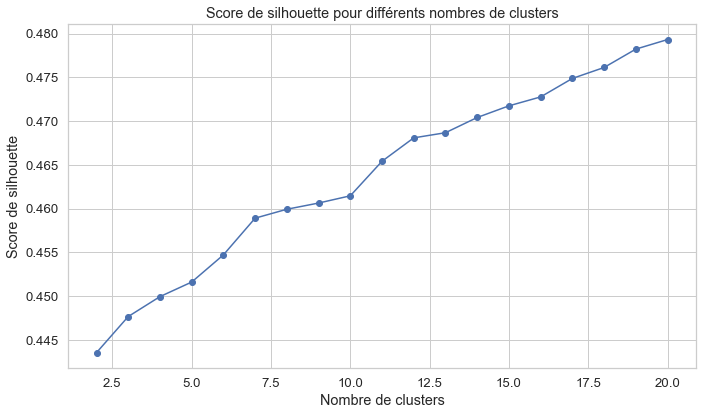

In [ ]:
# Visualisons les scores de silhouette
plt.figure(figsize=(10, 6))
plt.plot(range(2, 2 + len(silhouette_scores)), silhouette_scores, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score de silhouette')
plt.title('Score de silhouette pour différents nombres de clusters')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Appliquons K-means avec le nombre optimal de clusters
print(f"Application de K-means avec {optimal_k} clusters...")
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
text_clusters = kmeans.fit_predict(tfidf_reduced)

Application de K-means avec 20 clusters...


In [ ]:
# Ajoutons les étiquettes de cluster au DataFrame
df['text_cluster'] = text_clusters


Distribution des clusters basés sur le texte:
0       218
1     22888
2       343
3       666
4       285
5       101
6       330
7       372
8        89
9      5096
10     1489
11      435
12      403
13     1525
14     1024
15      960
16      543
17      809
18     1078
19     1942
Name: text_cluster, dtype: int64


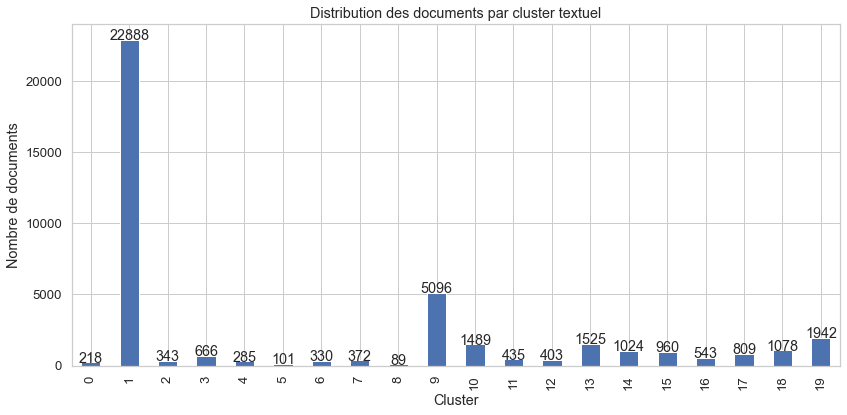

In [ ]:
# Résumé des clusters basés sur le texte
print("\nDistribution des clusters basés sur le texte:")
text_cluster_counts = df['text_cluster'].value_counts().sort_index()
print(text_cluster_counts)

# Visualisons la distribution des clusters
plt.figure(figsize=(12, 6))
ax = text_cluster_counts.plot(kind='bar')
plt.title('Distribution des documents par cluster textuel')
plt.xlabel('Cluster')
plt.ylabel('Nombre de documents')
for i, v in enumerate(text_cluster_counts):
    ax.text(i, v + 0.1, str(v), ha='center')
plt.tight_layout()
plt.show()

In [ ]:
# Extraire les principaux mots-clés pour chaque cluster
def get_top_keywords(tfidf_matrix, clusters, terms, n_terms=10):
    df_cluster_keywords = {}
    
    # Pour chaque cluster
    for cluster_id in range(max(clusters) + 1):
        # Filtrons les documents appartenant à ce cluster
        cluster_docs = tfidf_matrix[clusters == cluster_id]
        
        if cluster_docs.shape[0] == 0:
            continue
            
        # Calculons la moyenne des vecteurs TF-IDF pour ce cluster
        cluster_centroid = cluster_docs.mean(axis=0)
        
        # Convertissons en tableau 1D
        if isinstance(cluster_centroid, np.matrix):
            cluster_centroid = np.asarray(cluster_centroid).flatten()
        
        # Récupérons les indices des termes avec les scores TF-IDF les plus élevés
        sorted_indices = np.argsort(cluster_centroid)[::-1]
        top_indices = sorted_indices[:n_terms]
        
        # Récupérons les termes correspondants et leurs scores
        top_terms = [(terms[i], cluster_centroid[i]) for i in top_indices]
        
        df_cluster_keywords[cluster_id] = top_terms
    
    return df_cluster_keywords

print("\nMots-clés principaux pour chaque cluster:")
feature_names = np.array(tfidf_vectorizer.get_feature_names_out())
cluster_keywords = get_top_keywords(tfidf_matrix, text_clusters, feature_names, n_terms=10)


Mots-clés principaux pour chaque cluster:


In [ ]:
for cluster_id, keywords in cluster_keywords.items():
    print(f"Cluster {cluster_id} ({text_cluster_counts[cluster_id]} documents):")
    print(", ".join([f"{term} ({score:.4f})" for term, score in keywords]))
    print()

# Comparaison avec le clustering basé sur le graphe
if 'graph_cluster' in df.columns:
    print("\n--- Comparaison des clusterings basés sur le texte et sur le graphe ---")
    
    # Calculons les métriques de comparaison
    ari = adjusted_rand_score(df['text_cluster'], df['graph_cluster'])
    ami = adjusted_mutual_info_score(df['text_cluster'], df['graph_cluster'])
    
    print(f"Adjusted Rand Index: {ari:.4f}")
    print(f"Adjusted Mutual Information: {ami:.4f}")
    
    # Créons une table de contingence entre les deux clusterings
    contingency_table = pd.crosstab(
        df['text_cluster'], 
        df['graph_cluster'],
        normalize=False
    )
    
    print("\nTable de contingence (nombre de documents):")
    print(contingency_table)
    
    # Visualisation de la table de contingence
    plt.figure(figsize=(12, 10))
    sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt="d")
    plt.title('Comparaison des clusters basés sur le texte et sur le graphe')
    plt.xlabel('Clusters basés sur le graphe')
    plt.ylabel('Clusters basés sur le texte')
    plt.tight_layout()
    plt.show()
    
    # Visualisation en 2D des clusters
    print("\nPréparation de la visualisation 2D des documents...")
    
    # Appliquons t-SNE pour la visualisation
    tsne = TSNE(n_components=2, random_state=42, perplexity=min(30, tfidf_reduced.shape[0]-1))
    tsne_results = tsne.fit_transform(tfidf_reduced)
    
    # Créons un DataFrame pour la visualisation
    viz_df = pd.DataFrame({
        'x': tsne_results[:, 0],
        'y': tsne_results[:, 1],
        'text_cluster': df['text_cluster'],
        'graph_cluster': df['graph_cluster']
    })
    
    # Visualisons les clusters basés sur le texte
    plt.figure(figsize=(12, 10))
    sns.scatterplot(x='x', y='y', hue='text_cluster', data=viz_df, palette='tab20', alpha=0.7)
    plt.title('Clustering basé sur le contenu textuel (t-SNE)')
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    
    # Visualisons les clusters basés sur le graphe
    plt.figure(figsize=(12, 10))
    sns.scatterplot(x='x', y='y', hue='graph_cluster', data=viz_df, palette='tab20', alpha=0.7)
    plt.title('Clustering basé sur la structure du graphe (t-SNE)')
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


Cluster 0 (218 documents):
clustering (0.2770), data (0.0803), clusters (0.0793), algorithm (0.0607), cluster (0.0587), based (0.0420), method (0.0416), algorithms (0.0393), means (0.0384), paper (0.0310)

Cluster 1 (22888 documents):
review (0.0003), conference (0.0003), 2010 (0.0003), http (0.0002), publishing (0.0002), org (0.0002), para (0.0002), 10 (0.0002), available (0.0002), international (0.0002)

Cluster 2 (343 documents):
graph (0.2243), graphs (0.1367), algorithm (0.0454), vertices (0.0417), vertex (0.0398), problem (0.0383), edges (0.0346), number (0.0323), edge (0.0301), subgraph (0.0291)

Cluster 3 (666 documents):
image (0.1868), images (0.1102), segmentation (0.0497), method (0.0475), based (0.0369), proposed (0.0329), color (0.0284), using (0.0284), results (0.0275), paper (0.0272)

Cluster 4 (285 documents):
speech (0.2670), recognition (0.1061), speaker (0.0379), asr (0.0366), based (0.0331), noise (0.0326), word (0.0315), features (0.0301), acoustic (0.0280), paper

In [ ]:
# Sauvegardons le DataFrame avec les étiquettes de cluster
df.to_csv('data_with_clusters.csv', index=False)
print("\nDataFrame avec étiquettes de cluster sauvegardé dans 'data_with_clusters.csv'")


DataFrame avec étiquettes de cluster sauvegardé dans 'data_with_clusters.csv'


## Fonction 5

In [119]:
# Import des bibliothèques nécessaires
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
print("\n===== Classification supervisée des documents =====")

# Chargons les données avec les clusters
try:
    df = pd.read_csv('data_with_clusters.csv')
    print(f"Données chargées avec clusters: {df.shape[0]} documents")
except:
    print("Fichier data_with_clusters.csv non trouvé. Chargement des données brutes...")
    df = pd.read_csv('chemin_vers_fichier.csv', sep='\t')
    print(f"Données brutes chargées: {df.shape[0]} documents")


===== Classification supervisée des documents =====
Données chargées avec clusters: 40596 documents


In [ ]:
# Chargeons le graphe
try:
    G = nx.read_gpickle("content_graph.gpickle")
    print(f"Graphe chargé: {G.number_of_nodes()} nœuds, {G.number_of_edges()} arêtes")
    graph_available = True
except:
    print("Graphe non trouvé. Classification uniquement basée sur le contenu textuel.")
    graph_available = False

Graphe chargé: 40596 nœuds, 182309 arêtes



Distribution des classes à prédire:
1    10099
2     7388
5     5223
8     4812
7     4713
6     3570
4     2500
3     2291
Name: class, dtype: int64

Nombre de classes: 8
Classe 0 (1): 10099 documents (24.88%)
Classe 1 (2): 7388 documents (18.20%)
Classe 2 (3): 2291 documents (5.64%)
Classe 3 (4): 2500 documents (6.16%)
Classe 4 (5): 5223 documents (12.87%)
Classe 5 (6): 3570 documents (8.79%)
Classe 6 (7): 4713 documents (11.61%)
Classe 7 (8): 4812 documents (11.85%)

--- Classification basée sur le contenu textuel ---
Utilisation de la colonne 'processed_abstract' pour les caractéristiques textuelles
Ensemble d'entraînement: 28417 documents
Ensemble de test: 12179 documents

Entraînement du classifieur RandomForest...
Exactitude (RandomForest): 0.2940
F1-score (RandomForest): 0.1983

Rapport de classification:
              precision    recall  f1-score   support

           1       0.28      0.94      0.43      3030
           2       0.38      0.16      0.22      2216
           

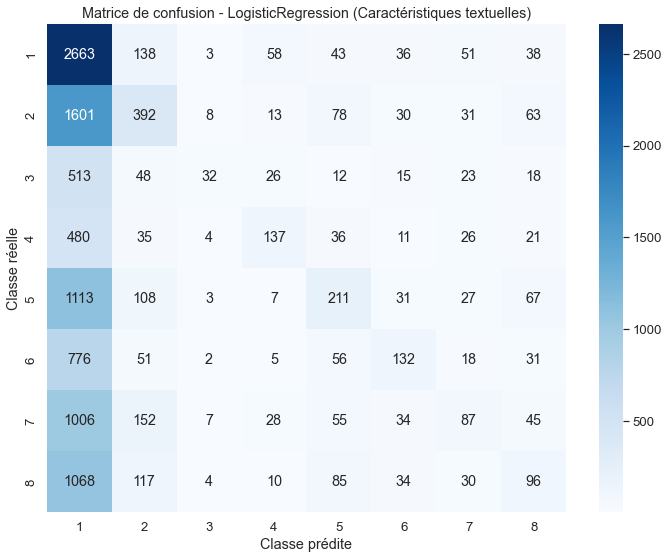

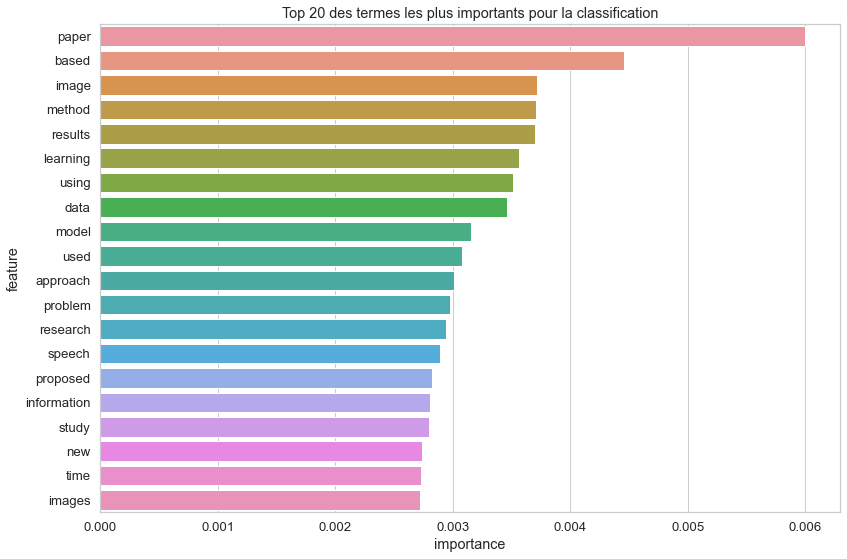


--- Classification basée sur les caractéristiques structurelles ---
Documents présents dans le graphe: 40596
Extraction des caractéristiques structurelles...

Entraînement du classifieur RandomForest sur les caractéristiques structurelles...
Exactitude (RandomForest): 0.2166
F1-score (RandomForest): 0.1377

Rapport de classification:
              precision    recall  f1-score   support

           1       0.25      0.75      0.37      3030
           2       0.16      0.07      0.09      2216
           3       0.07      0.02      0.03       687
           4       0.06      0.02      0.03       750
           5       0.14      0.05      0.08      1567
           6       0.06      0.01      0.02      1071
           7       0.12      0.04      0.06      1414
           8       0.10      0.03      0.05      1444

    accuracy                           0.22     12179
   macro avg       0.12      0.12      0.09     12179
weighted avg       0.15      0.22      0.14     12179


Entraînemen

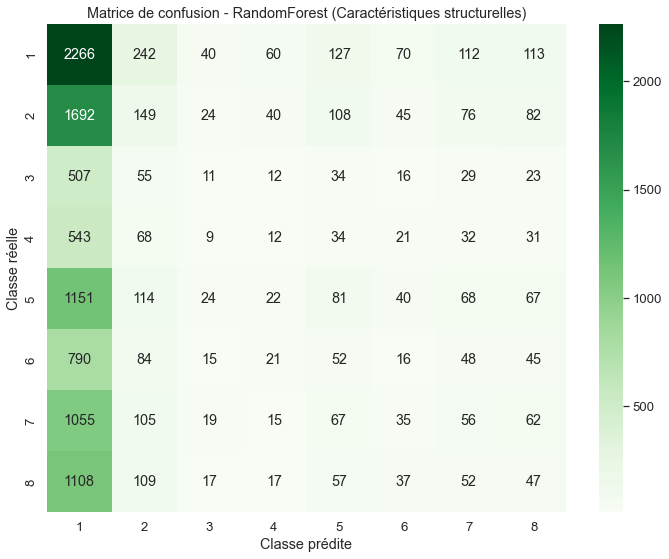

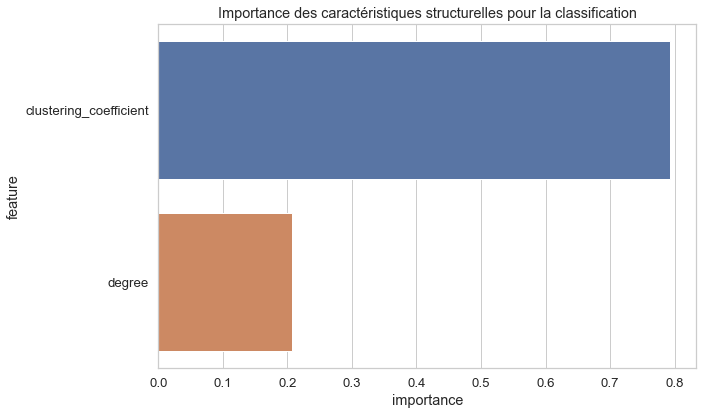


--- Classification hybride (texte + structure) ---
Caractéristiques combinées: 5002 features pour 40596 documents

Entraînement du classifieur RandomForest sur les caractéristiques combinées...
Exactitude (RandomForest): 0.2770
F1-score (RandomForest): 0.2094

Rapport de classification:
              precision    recall  f1-score   support

           1       0.29      0.80      0.42      3030
           2       0.28      0.20      0.23      2216
           3       0.09      0.01      0.02       687
           4       0.35      0.13      0.19       750
           5       0.26      0.12      0.16      1567
           6       0.29      0.10      0.15      1071
           7       0.14      0.03      0.06      1414
           8       0.17      0.05      0.07      1444

    accuracy                           0.28     12179
   macro avg       0.23      0.18      0.16     12179
weighted avg       0.24      0.28      0.21     12179


Entraînement du classifieur SVM sur les caractéristiques co

MemoryError: Unable to allocate 1.03 GiB for an array with shape (27535, 5002) and data type float64

In [ ]:

# Vérifions si la classe cible est disponible
if 'class' not in df.columns:
    print("Erreur: La colonne 'class' n'est pas disponible. Impossible de procéder à la classification supervisée.")
else:
    print("\nDistribution des classes à prédire:")
    class_counts = df['class'].value_counts()
    print(class_counts)
    
    # Encodons les classes
    le = LabelEncoder()
    y = le.fit_transform(df['class'])
    
    # Convertissons les classes en chaînes de caractères pour l'affichage
    class_names = [str(c) for c in le.classes_]
    
    # Vérifions le nombre de classes et leur distribution
    print(f"\nNombre de classes: {len(class_names)}")
    for i, class_name in enumerate(class_names):
        count = (y == i).sum()
        print(f"Classe {i} ({class_name}): {count} documents ({count/len(y)*100:.2f}%)")
    
    # 1. Classification basée uniquement sur le contenu textuel
    print("\n--- Classification basée sur le contenu textuel ---")
    
    # Préparation des données textuelles
    if 'processed_abstract' in df.columns:
        text_column = 'processed_abstract'
    elif 'abstract' in df.columns:
        text_column = 'abstract'
    else:
        text_column = 'title'
    
    print(f"Utilisation de la colonne '{text_column}' pour les caractéristiques textuelles")
    
    # Vectorisation TF-IDF
    tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
    X_text = tfidf_vectorizer.fit_transform(df[text_column].fillna(''))
    
    # Division en ensembles d'entraînement et de test
    X_text_train, X_text_test, y_train, y_text_test = train_test_split(
        X_text, y, test_size=0.3, random_state=42, stratify=y)
    
    print(f"Ensemble d'entraînement: {X_text_train.shape[0]} documents")
    print(f"Ensemble de test: {X_text_test.shape[0]} documents")
    
    # Entraînement et évaluation de différents classifieurs
    classifiers = {
        'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
        'SVM': SVC(kernel='linear', random_state=42),
        'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42)
    }
    
    text_results = {}
    
    for name, clf in classifiers.items():
        print(f"\nEntraînement du classifieur {name}...")
        clf.fit(X_text_train, y_train)
        
        # Évaluation sur l'ensemble de test
        y_pred = clf.predict(X_text_test)
        
        # Stocker les résultats
        accuracy = accuracy_score(y_text_test, y_pred)
        f1 = f1_score(y_text_test, y_pred, average='weighted')
        text_results[name] = {
            'accuracy': accuracy,
            'f1': f1,
            'predictions': y_pred,
            'model': clf
        }
        
        print(f"Exactitude ({name}): {accuracy:.4f}")
        print(f"F1-score ({name}): {f1:.4f}")
        print("\nRapport de classification:")
        print(classification_report(y_text_test, y_pred, target_names=class_names))
    
    # Meilleur modèle basé sur le contenu textuel
    best_text_model = max(text_results.items(), key=lambda x: x[1]['f1'])
    print(f"\nMeilleur modèle basé sur le contenu textuel: {best_text_model[0]} (F1: {best_text_model[1]['f1']:.4f})")
    
    # Matrice de confusion pour le meilleur modèle textuel
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_text_test, best_text_model[1]['predictions'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
               xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Matrice de confusion - {best_text_model[0]} (Caractéristiques textuelles)')
    plt.xlabel('Classe prédite')
    plt.ylabel('Classe réelle')
    plt.tight_layout()
    plt.show()
    
    # Importance des features pour RandomForest
    if 'RandomForest' in text_results:
        rf_model = text_results['RandomForest']['model']
        if hasattr(rf_model, 'feature_importances_'):
            # Récupérons les noms des features
            feature_names = tfidf_vectorizer.get_feature_names_out()
            
            # Créons un DataFrame pour l'importance des features
            feature_importance = pd.DataFrame({
                'feature': feature_names,
                'importance': rf_model.feature_importances_
            })
            
            # Affichons les 20 features les plus importantes
            top_features = feature_importance.sort_values('importance', ascending=False).head(20)
            
            plt.figure(figsize=(12, 8))
            sns.barplot(x='importance', y='feature', data=top_features)
            plt.title('Top 20 des termes les plus importants pour la classification')
            plt.tight_layout()
            plt.show()
    
    # 2. Classification basée uniquement sur les caractéristiques structurelles (graphe)
    if graph_available:
        print("\n--- Classification basée sur les caractéristiques structurelles ---")
        
        # Vérifions quels documents sont présents dans le graphe
        doc_ids = set(df['id'].astype(str).tolist())
        graph_nodes = set(G.nodes())
        common_nodes = doc_ids.intersection(graph_nodes)
        
        if len(common_nodes) > 0:
            print(f"Documents présents dans le graphe: {len(common_nodes)}")
            
            # Créons un masque pour les documents présents dans le graphe
            mask = df['id'].astype(str).isin(common_nodes)
            df_graph = df[mask].copy()
            y_graph = y[mask]
            
            # Extraire des caractéristiques structurelles
            print("Extraction des caractéristiques structurelles...")
            graph_features = {}
            
            # Caractéristiques de base: degré et centralités
            for node in common_nodes:
                graph_features[node] = {
                    'degree': G.degree(node),
                    'clustering_coefficient': nx.clustering(G, node)
                }
            
            # Ajoutons d'autres centralités (pour les graphes pas trop grands)
            if len(common_nodes) <= 5000:
                # Calculons sur un sous-graphe pour accélérer
                G_sub = G.subgraph(common_nodes)
                
                # Centralité de vecteur propre
                try:
                    eigenvector_centrality = nx.eigenvector_centrality(G_sub)
                    for node, score in eigenvector_centrality.items():
                        graph_features[node]['eigenvector_centrality'] = score
                except:
                    print("Erreur lors du calcul de la centralité de vecteur propre.")
                
                # Centralité de proximité (closeness)
                try:
                    closeness_centrality = nx.closeness_centrality(G_sub)
                    for node, score in closeness_centrality.items():
                        graph_features[node]['closeness_centrality'] = score
                except:
                    print("Erreur lors du calcul de la centralité de proximité.")
                
                # PageRank
                try:
                    pagerank = nx.pagerank(G_sub)
                    for node, score in pagerank.items():
                        graph_features[node]['pagerank'] = score
                except:
                    print("Erreur lors du calcul de PageRank.")
            
            # Ajoutons les clusters si disponibles
            if 'graph_cluster' in df.columns:
                # Créons un mapping des IDs vers les clusters
                cluster_mapping = dict(zip(df['id'].astype(str), df['graph_cluster']))
                
                for node in common_nodes:
                    if node in cluster_mapping:
                        graph_features[node]['cluster'] = cluster_mapping[node]
            
            # Convertissons le dictionnaire en DataFrame
            graph_features_df = pd.DataFrame.from_dict(graph_features, orient='index')
            
            # on s'assure que toutes les colonnes sont numériques
            for col in graph_features_df.columns:
                graph_features_df[col] = pd.to_numeric(graph_features_df[col], errors='coerce')
            
            # Remplacons les valeurs manquantes par 0
            graph_features_df.fillna(0, inplace=True)
            
            # Extraire la matrice de caractéristiques
            X_graph = graph_features_df.values
            
            # Standardisons les caractéristiques
            scaler = StandardScaler()
            X_graph_scaled = scaler.fit_transform(X_graph)
            
            # Division en ensembles d'entraînement et de test
            X_graph_train, X_graph_test, y_graph_train, y_graph_test = train_test_split(
                X_graph_scaled, y_graph, test_size=0.3, random_state=42, stratify=y_graph)
            
            # Entraînement et évaluation des classifieurs
            graph_results = {}
            
            for name, clf in classifiers.items():
                print(f"\nEntraînement du classifieur {name} sur les caractéristiques structurelles...")
                clf.fit(X_graph_train, y_graph_train)
                
                # Évaluation sur l'ensemble de test
                y_pred = clf.predict(X_graph_test)
                
                # Stockons les résultats
                accuracy = accuracy_score(y_graph_test, y_pred)
                f1 = f1_score(y_graph_test, y_pred, average='weighted')
                graph_results[name] = {
                    'accuracy': accuracy,
                    'f1': f1,
                    'predictions': y_pred,
                    'model': clf
                }
                
                print(f"Exactitude ({name}): {accuracy:.4f}")
                print(f"F1-score ({name}): {f1:.4f}")
                print("\nRapport de classification:")
                print(classification_report(y_graph_test, y_pred, target_names=class_names))
            
            # Meilleur modèle basé sur les caractéristiques structurelles
            best_graph_model = max(graph_results.items(), key=lambda x: x[1]['f1'])
            print(f"\nMeilleur modèle basé sur les caractéristiques structurelles: {best_graph_model[0]} (F1: {best_graph_model[1]['f1']:.4f})")
            
            # Matrice de confusion pour le meilleur modèle structurel
            plt.figure(figsize=(10, 8))
            cm = confusion_matrix(y_graph_test, best_graph_model[1]['predictions'])
            sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', 
                       xticklabels=class_names, yticklabels=class_names)
            plt.title(f'Matrice de confusion - {best_graph_model[0]} (Caractéristiques structurelles)')
            plt.xlabel('Classe prédite')
            plt.ylabel('Classe réelle')
            plt.tight_layout()
            plt.show()
            
            # Importance des features pour RandomForest (caractéristiques structurelles)
            if 'RandomForest' in graph_results:
                rf_model = graph_results['RandomForest']['model']
                if hasattr(rf_model, 'feature_importances_'):
                    # Créons un DataFrame pour l'importance des features
                    feature_importance = pd.DataFrame({
                        'feature': graph_features_df.columns,
                        'importance': rf_model.feature_importances_
                    })
                    
                    # Trions par importance
                    feature_importance = feature_importance.sort_values('importance', ascending=False)
                    
                    plt.figure(figsize=(10, 6))
                    sns.barplot(x='importance', y='feature', data=feature_importance)
                    plt.title('Importance des caractéristiques structurelles pour la classification')
                    plt.tight_layout()
                    plt.show()
            
            # 3. Classification hybride (texte + structure)
            print("\n--- Classification hybride (texte + structure) ---")
            
            # Vérifions que nous avons les mêmes documents pour les deux approches
            common_indices = df[mask].index
            
            # Extraire les caractéristiques textuelles pour ces documents
            X_text_common = X_text[common_indices]
            
            # Convertissons en tableau dense pour la concaténation
            X_text_common_dense = X_text_common.toarray()
            
            # Combinons les caractéristiques textuelles et structurelles
            X_combined = np.hstack((X_text_common_dense, X_graph_scaled))
            
            print(f"Caractéristiques combinées: {X_combined.shape[1]} features pour {X_combined.shape[0]} documents")
            
            # Division en ensembles d'entraînement et de test
            X_comb_train, X_comb_test, y_comb_train, y_comb_test = train_test_split(
                X_combined, y_graph, test_size=0.3, random_state=42, stratify=y_graph)
            
            # Entraînement et évaluation des classifieurs
            combined_results = {}
            
            for name, clf in classifiers.items():
                print(f"\nEntraînement du classifieur {name} sur les caractéristiques combinées...")
                clf.fit(X_comb_train, y_comb_train)
                
                # Évaluation sur l'ensemble de test
                y_pred = clf.predict(X_comb_test)
                
                # Stockons les résultats
                accuracy = accuracy_score(y_comb_test, y_pred)
                f1 = f1_score(y_comb_test, y_pred, average='weighted')
                combined_results[name] = {
                    'accuracy': accuracy,
                    'f1': f1,
                    'predictions': y_pred,
                    'model': clf
                }
                
                print(f"Exactitude ({name}): {accuracy:.4f}")
                print(f"F1-score ({name}): {f1:.4f}")
                print("\nRapport de classification:")
                print(classification_report(y_comb_test, y_pred, target_names=class_names))
            
            # Meilleur modèle hybride
            best_combined_model = max(combined_results.items(), key=lambda x: x[1]['f1'])
            print(f"\nMeilleur modèle hybride: {best_combined_model[0]} (F1: {best_combined_model[1]['f1']:.4f})")
            
            # Matrice de confusion pour le meilleur modèle hybride
            plt.figure(figsize=(10, 8))
            cm = confusion_matrix(y_comb_test, best_combined_model[1]['predictions'])
            sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', 
                       xticklabels=class_names, yticklabels=class_names)
            plt.title(f'Matrice de confusion - {best_combined_model[0]} (Caractéristiques combinées)')
            plt.xlabel('Classe prédite')
            plt.ylabel('Classe réelle')
            plt.tight_layout()
            plt.show()
            
            # 4. Comparaison des performances
            print("\n--- Comparaison des performances ---")
            
            # Récupérons les F1-scores pour chaque approche et modèle
            f1_scores = {
                'Textuelle': {name: results['f1'] for name, results in text_results.items()},
                'Structurelle': {name: results['f1'] for name, results in graph_results.items()},
                'Hybride': {name: results['f1'] for name, results in combined_results.items()}
            }
            
            # Meilleur modèle pour chaque approche
            best_scores = {
                'Textuelle': best_text_model[1]['f1'],
                'Structurelle': best_graph_model[1]['f1'],
                'Hybride': best_combined_model[1]['f1']
            }
            
            # Visualisation des performances
            plt.figure(figsize=(12, 6))
            
            # Graphique à barres pour tous les modèles
            df_scores = pd.DataFrame(f1_scores)
            df_scores.plot(kind='bar', figsize=(12, 6))
            plt.title('Comparaison des F1-scores par modèle et approche')
            plt.xlabel('Modèle')
            plt.ylabel('F1-score')
            plt.ylim(0, 1)
            plt.grid(axis='y', alpha=0.3)
            plt.legend(title='Approche')
            plt.tight_layout()
            plt.show()
            
            # Graphique à barres pour les meilleurs modèles
            plt.figure(figsize=(10, 6))
            approaches = list(best_scores.keys())
            scores = list(best_scores.values())
            
            bars = plt.bar(approaches, scores, color=['blue', 'green', 'purple'])
            plt.title('Comparaison des meilleurs modèles par approche')
            plt.xlabel('Approche')
            plt.ylabel('F1-score')
            plt.ylim(0, 1)
            
            # Ajoutons les valeurs sur les barres
            for i, bar in enumerate(bars):
                plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                        f'{scores[i]:.4f}', ha='center')
            
            plt.grid(axis='y', alpha=0.3)
            plt.tight_layout()
            plt.show()
            
            # 5. Analyse des erreurs pour comprendre les différences entre les approches
            print("\n--- Analyse des erreurs ---")
            
            # Créons des DataFrames avec les vraies classes et les prédictions
            y_true_indices = np.arange(len(y_comb_test))
            error_df = pd.DataFrame({
                'true_class': le.inverse_transform(y_comb_test),
                'text_pred': le.inverse_transform(best_text_model[1]['predictions']),
                'graph_pred': le.inverse_transform(best_graph_model[1]['predictions']),
                'combined_pred': le.inverse_transform(best_combined_model[1]['predictions'])
            })
            
            # Ajoutons des colonnes pour indiquer si la prédiction est correcte
            error_df['text_correct'] = error_df['true_class'] == error_df['text_pred']
            error_df['graph_correct'] = error_df['true_class'] == error_df['graph_pred']
            error_df['combined_correct'] = error_df['true_class'] == error_df['combined_pred']
            
            # Identifions les cas où une approche fonctionne mieux que l'autre
            error_df['text_only_correct'] = error_df['text_correct'] & ~error_df['graph_correct']
            error_df['graph_only_correct'] = error_df['graph_correct'] & ~error_df['text_correct']
            error_df['both_correct'] = error_df['text_correct'] & error_df['graph_correct']
            error_df['both_wrong'] = ~error_df['text_correct'] & ~error_df['graph_correct']
            
            # Statistiques sur les cas
            text_only_correct = error_df['text_only_correct'].sum()
            graph_only_correct = error_df['graph_only_correct'].sum()
            both_correct = error_df['both_correct'].sum()
            both_wrong = error_df['both_wrong'].sum()
            total = len(error_df)
            
            print(f"Cas où seule l'approche textuelle est correcte: {text_only_correct} ({text_only_correct/total*100:.2f}%)")
            print(f"Cas où seule l'approche structurelle est correcte: {graph_only_correct} ({graph_only_correct/total*100:.2f}%)")
            print(f"Cas où les deux approches sont correctes: {both_correct} ({both_correct/total*100:.2f}%)")
            print(f"Cas où les deux approches sont incorrectes: {both_wrong} ({both_wrong/total*100:.2f}%)")
            
            # Visualisation du diagramme de Venn
            try:
                plt.figure(figsize=(10, 6))
                from matplotlib_venn import venn2
                
                venn2(subsets=(text_only_correct, graph_only_correct, both_correct),
                     set_labels=('Textuelle', 'Structurelle'))
                plt.title('Diagramme de Venn des prédictions correctes par approche')
                plt.show()
            except ImportError:
                print("Module matplotlib_venn non disponible. Impossible d'afficher le diagramme de Venn.")
                print("Installez-le avec: pip install matplotlib-venn")
            
            # Analyse des classes pour lesquelles chaque approche fonctionne mieux
            print("\nClasses mieux prédites par l'approche textuelle:")
            text_better = error_df[error_df['text_correct'] & ~error_df['graph_correct']]
            text_better_classes = text_better['true_class'].value_counts()
            print(text_better_classes)
            
            print("\nClasses mieux prédites par l'approche structurelle:")
            graph_better = error_df[error_df['graph_correct'] & ~error_df['text_correct']]
            graph_better_classes = graph_better['true_class'].value_counts()
            print(graph_better_classes)
            
            # Visualisation des classes pour lesquelles chaque approche fonctionne mieux
            plt.figure(figsize=(12, 6))
            
            # Créons un DataFrame pour la visualisation
            better_classes = pd.DataFrame({
                'Textuelle': text_better_classes.reindex(le.classes_, fill_value=0),
                'Structurelle': graph_better_classes.reindex(le.classes_, fill_value=0)
            })
            
            # Normalisons par le nombre total d'instances de chaque classe
            class_counts = error_df['true_class'].value_counts()
            for col in better_classes.columns:
                better_classes[col] = better_classes[col] / class_counts
            
            # Tracons le graphique
            better_classes.plot(kind='bar', figsize=(12, 6))
            plt.title('Proportion de prédictions correctes uniquement par une approche, par classe')
            plt.xlabel('Classe')
            plt.ylabel('Proportion')
            plt.grid(axis='y', alpha=0.3)
            plt.legend(title='Approche')
            plt.tight_layout()
            plt.show()
        else:
            print("Aucun document du DataFrame n'est présent dans le graphe.")
    else:
        print("Graphe non disponible, impossible de réaliser la classification basée sur la structure.")

print("\nClassification supervisée terminée.")